In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Read an Image

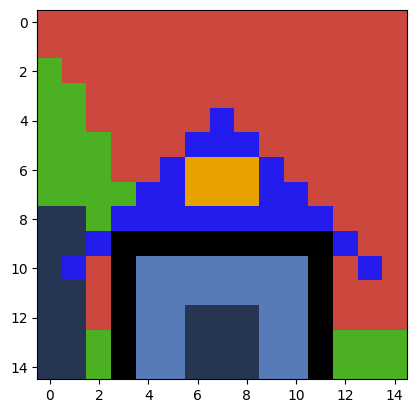

In [2]:
img = cv2.imread("./resources/house_15_15.png")
plt.imshow(img)

Image is displayed in RGB (Red, Green, Blue) but CV2 loads the image in BGR (Blue, Green, Red), which means the color channels are in the wrong order.

Image is represented as a 3d array [y, x, colors] in our case (15, 15, 3).

We can use CV2 to swap the colors or do it manually.

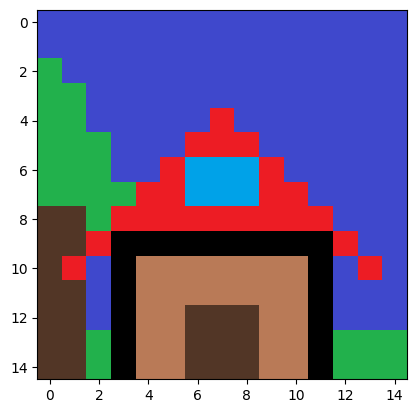

In [3]:
# manual conversion
img_manual = img.copy()[:,:, ::-1] # <-- Keep y and x as is and reverse the color channels. Meaning BGR --> RGB
plt.imshow(img_manual)


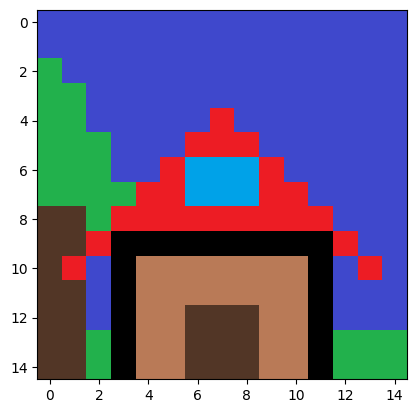

In [4]:
# cv2 
img_cv = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
plt.imshow(img_cv)

Extracting each Color Channel. Number Range from 0 - 255. Represents the intensity of the color
The higher the strong the color.

In [5]:
blue = img[:, :, 0]
green = img[:, :, 1]
red = img[:, :, 2]



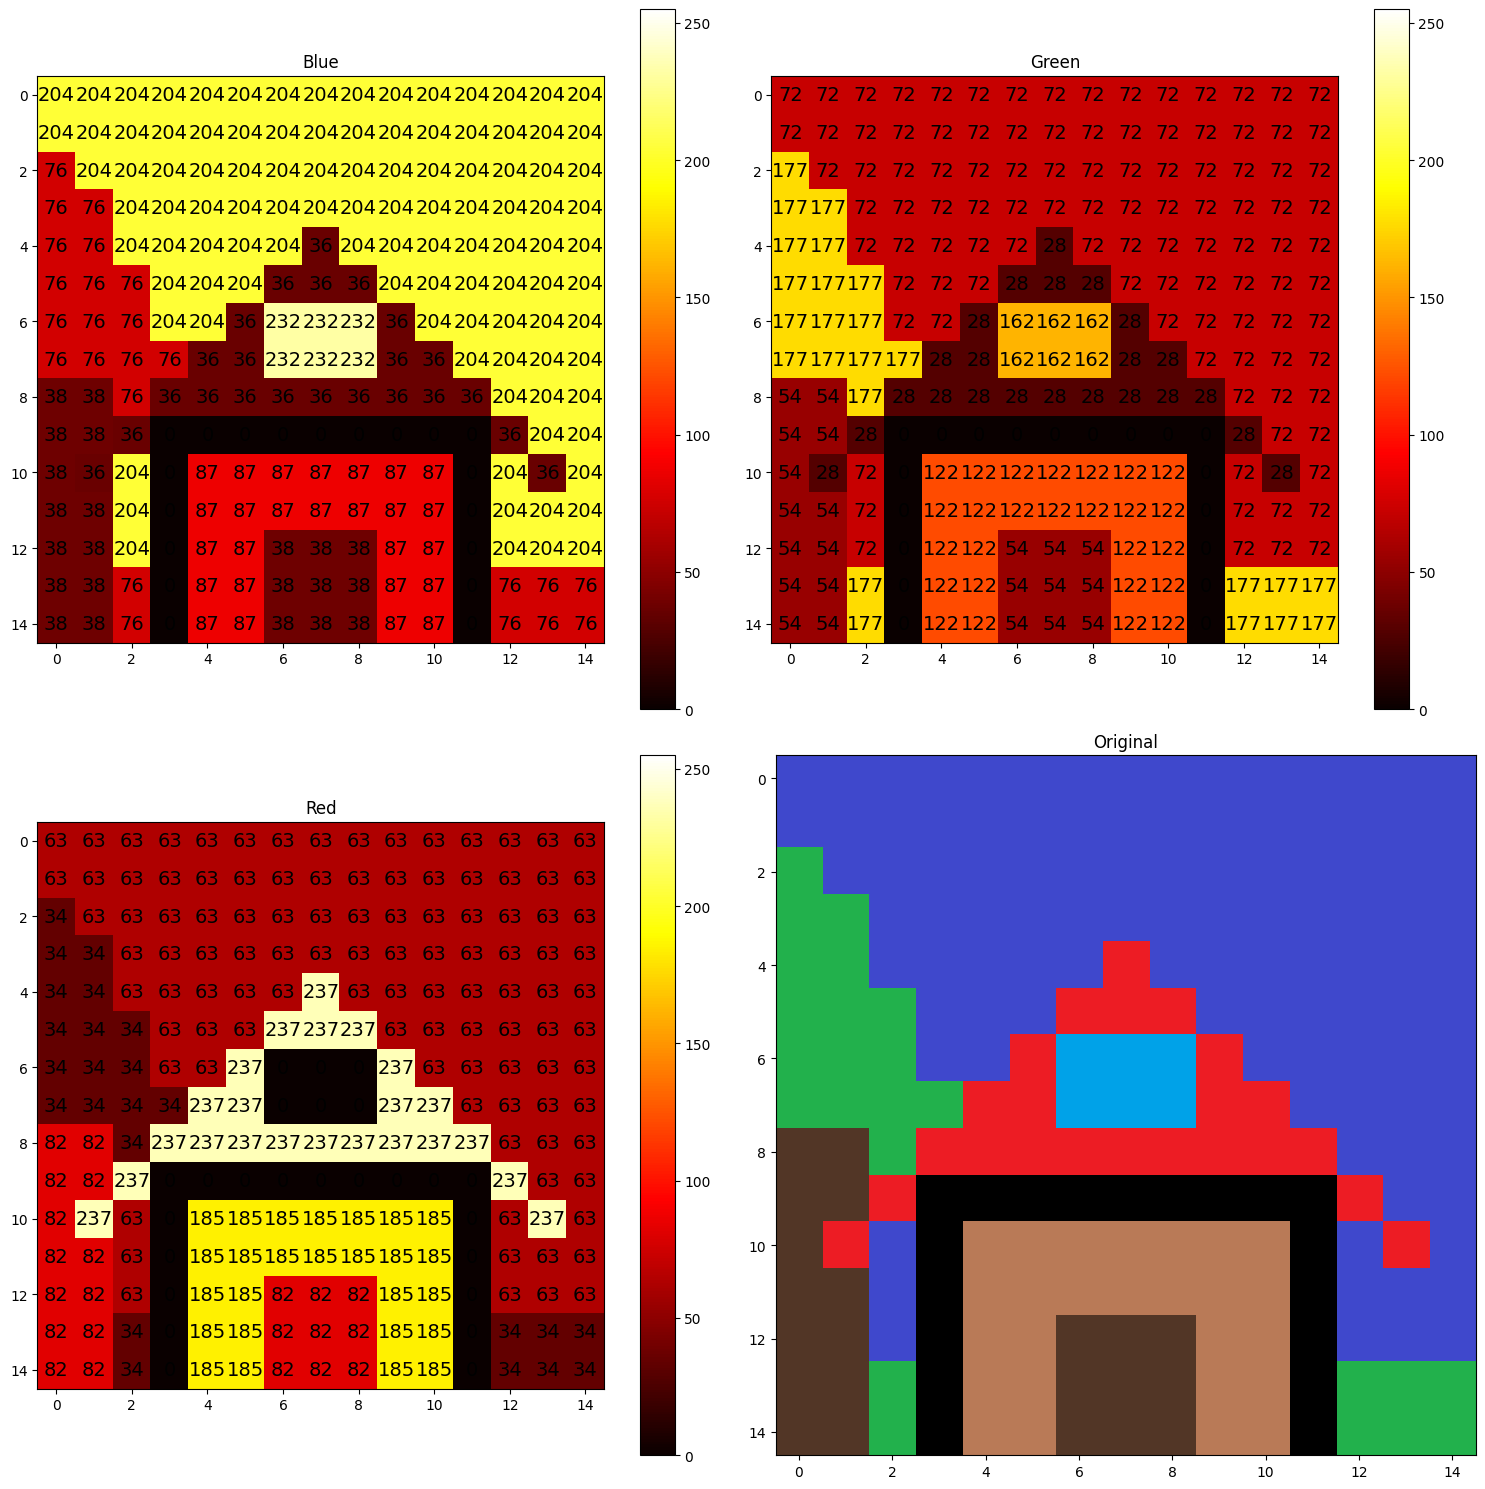

In [6]:
figure = plt.figure(figsize=(15, 15)) 

# Function to annotate heatmap with larger text
def annotate_heatmap(data, ax, fontsize=12):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            ax.text(j, i, f'{data[i, j]}', ha='center', va='center', color='black', fontsize=fontsize)

# Plot Blue channel with value range from 0 to 255
ax1 = figure.add_subplot(2, 2, 1)
im1 = ax1.imshow(blue, cmap="hot", vmin=0, vmax=255)
plt.colorbar(im1, ax=ax1)
plt.title("Blue")
annotate_heatmap(blue, ax1, fontsize=14)

# Plot Green channel with value range from 0 to 255
ax2 = figure.add_subplot(2, 2, 2)
im2 = ax2.imshow(green, cmap="hot", vmin=0, vmax=255)
plt.colorbar(im2, ax=ax2)
plt.title("Green")
annotate_heatmap(green, ax2, fontsize=14)

# Plot Red channel with value range from 0 to 255
ax3 = figure.add_subplot(2, 2, 3)
im3 = ax3.imshow(red, cmap="hot", vmin=0, vmax=255)
plt.colorbar(im3, ax=ax3)
plt.title("Red")
annotate_heatmap(red, ax3, fontsize=14)

# Plot Original image
ax4 = figure.add_subplot(2, 2, 4)
ax4.imshow(img_cv)
plt.title("Original")

plt.tight_layout()
plt.show()

Grabbing pixel from the  image. E.g. y = 6 and x = 6 

In [7]:
red_6_6 = red[6:7, 6:7] # Keeping the array structure
blue_6_6 = blue[6:7, 6:7]
green_6_6 = green[6:7, 6:7]

In [8]:
red_6_6.shape

(1, 1)

Building a fully colored pixel

In [9]:
full_pixel = np.array([red_6_6, green_6_6, blue_6_6])
full_pixel.shape # <-- Wrong order of dimensions expected y, x, color but got color, y, x 

(3, 1, 1)

In [10]:
rearanged_pixel = full_pixel.transpose((2,1,0))

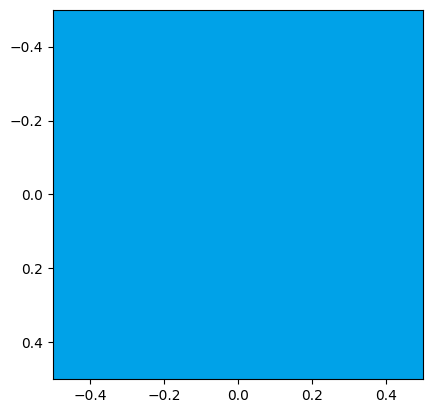

In [11]:
plt.imshow(rearanged_pixel) # <-- Blue color of the window

Draw a yellow square in the upper right corner 4x4

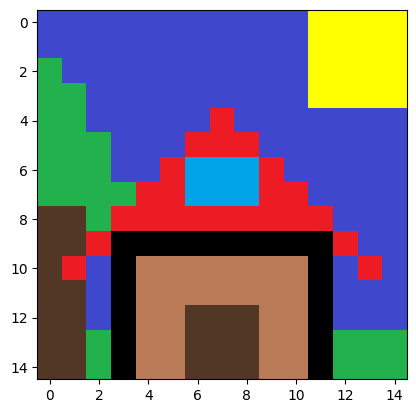

In [12]:
draw_image = img_cv.copy()
# Update red
draw_image[0:4, -4:, 0] = 255
# Update green
draw_image[0:4, -4:, 1] = 255
# Update blue
draw_image[0:4, -4:, 2] = 0

plt.imshow(draw_image)